<a href="https://colab.research.google.com/github/kazuhiko1979/my_automl/blob/main/2_Kaggle_Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret==2.3.6
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 301 kB 5.1 MB/s 
     |████████████████████████████████| 10.4 MB 731 kB/s 
     |████████████████████████████████| 1.7 MB 31.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 22.7 MB/s 
     |████████████████████████████████| 88 kB 8.2 MB/s 
     |████████████████████████████████| 262 kB 65.6 MB/s 
     |████████████████████████████████| 2.0 MB 52.5 MB/s 
     |████████████████████████████████| 1.3 MB 39.8 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 122 kB 60.2 MB/s 
     |████████████████████████████████| 167 kB 44.0 MB/s 
     |████████████████████████████████| 17.9 MB 326 kB/s 
     |████████████████████████████████| 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 5.1 MB/s 
     |████████████████████████████████| 303 kB 27.5 MB/s 
     |████████████████████████████████| 3.1 MB 64.3 MB/s 
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.2.0
    Uninstalling tangled-up-in-unicode-0.2.0:
      Successfully uninstalled tangled-up-in-unicode-0.2.0
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.2.0
    Uninstalling pandas-profiling-3.2.0:
      Successfully uninstalled pandas-profiling-3.2.0
ERRO

In [ ]:
from pycaret.utils import enable_colab

enable_colab()

Colab mode enabled.


In [ ]:
import numpy as np
import pandas as pd

train_data = pd.read_csv("train.csv")  # 訓練データ
train_data = train_data.drop(['casual', 'registered'], axis=1)


test_data = pd.read_csv("test.csv") # テストデータ
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [ ]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
from pycaret.regression import setup

clf = setup(data=train_data, target="count", session_id=123) 

,Description,Value
0,session_id,123
1,Target,count
2,Original Data,"(10886, 10)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7620, 58)"


In [ ]:
from pycaret.regression import compare_models

best_model = compare_models()  

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,4.883050e+01,4.883244e+03,6.981080e+01,8.514000e-01,0.5953,0.7903,0.134
rf,Random Forest Regressor,5.060640e+01,5.731650e+03,7.564220e+01,8.254000e-01,0.5227,0.6523,4.452
et,Extra Trees Regressor,4.899840e+01,5.795374e+03,7.607950e+01,8.237000e-01,0.4514,0.4783,4.338
gbr,Gradient Boosting Regressor,6.640580e+01,8.691124e+03,9.314580e+01,7.358000e-01,0.7920,1.3574,0.875
dt,Decision Tree Regressor,6.570870e+01,1.081379e+04,1.039058e+02,6.707000e-01,0.6490,0.7312,0.089
lr,Linear Regression,7.910670e+01,1.188822e+04,1.089520e+02,6.386000e-01,0.9928,2.4576,0.041
ridge,Ridge Regression,7.910880e+01,1.188784e+04,1.089504e+02,6.386000e-01,0.9937,2.4542,0.028
br,Bayesian Ridge,7.911190e+01,1.188790e+04,1.089507e+02,6.386000e-01,0.9940,2.4520,0.052
lasso,Lasso Regression,8.143820e+01,1.253569e+04,1.118818e+02,6.190000e-01,1.0088,2.3777,0.043
huber,Huber Regressor,7.904350e+01,1.280295e+04,1.130703e+02,6.110000e-01,0.9570,2.2619,0.408


In [ ]:
print(best_model)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
from pycaret.regression import models

models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
from pycaret.regression import create_model

lightgbm = create_model("lightgbm")  

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,52.2694,5655.4596,75.2028,0.8430,0.5756,0.7541
1,50.4780,4962.6158,70.4458,0.8565,0.6311,0.8938
2,48.0715,4911.2789,70.0805,0.8418,0.5793,0.7140
3,50.1078,5155.7422,71.8035,0.8385,0.5651,0.7574
4,45.5468,4122.9495,64.2102,0.8640,0.5827,0.8073
5,48.0073,4557.4370,67.5088,0.8689,0.6228,0.8212
6,48.0219,4542.3908,67.3973,0.8662,0.5920,0.7551
7,49.8205,5399.7361,73.4829,0.8242,0.6201,0.8060
8,49.1365,5003.3834,70.7346,0.8481,0.5675,0.6659
9,46.8455,4521.4425,67.2417,0.8625,0.6171,0.9287


In [ ]:
print(lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
from pycaret.regression import tune_model

tuned_lightgbm = tune_model(lightgbm)  # ハイパーパラメータの調整

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,55.2190,5986.8943,77.3750,0.8338,0.7101,1.0257
1,53.0274,5234.5193,72.3500,0.8487,0.7469,1.3234
2,52.5306,5640.1021,75.1006,0.8184,0.7516,1.2167
3,53.5502,5787.2442,76.0739,0.8187,0.6892,1.1132
4,48.8156,4547.2313,67.4332,0.8500,0.6937,1.1931
5,52.2487,5381.1095,73.3560,0.8452,0.7081,1.1098
6,51.0881,4929.3585,70.2094,0.8548,0.7019,1.1469
7,53.0271,5605.5114,74.8700,0.8175,0.7495,1.3346
8,52.2654,5267.6087,72.5783,0.8401,0.6493,0.8832
9,50.6973,5120.5960,71.5583,0.8443,0.7755,1.3359


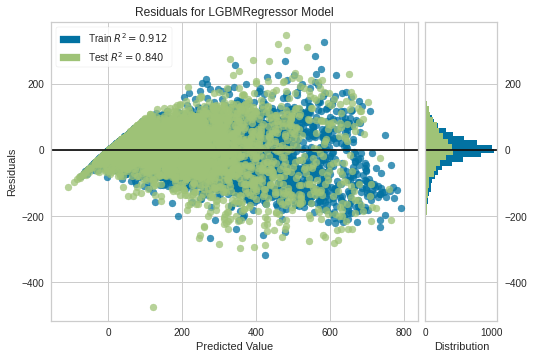

In [ ]:
from pycaret.regression import plot_model

plot_model(tuned_lightgbm)

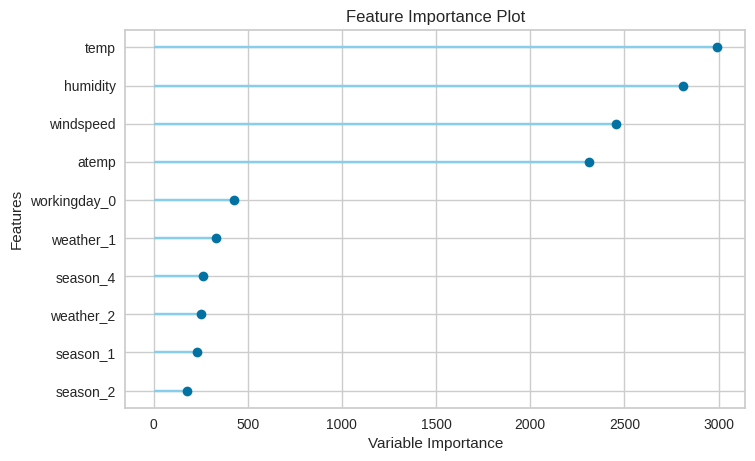

In [ ]:
plot_model(tuned_lightgbm, plot="feature")  # 各特徴の重要度をプロット

In [ ]:
from pycaret.regression import evaluate_model

evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
from pycaret.regression import finalize_model

final_lightgbm = finalize_model(tuned_lightgbm)
print(final_lightgbm)

LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
from pycaret.regression import predict_model

predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,38.0216,2776.3944,52.6915,0.9145,0.5829,0.8188


In [ ]:
from pycaret.regression import save_model

save_model(final_lightgbm, "lightgbm_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='count',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.4,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_samples=41,
                    

In [ ]:
from pycaret.regression import load_model

loaded_lightgbm = load_model("lightgbm_model")

Transformation Pipeline and Model Successfully Loaded


In [ ]:
test_pred = predict_model(loaded_lightgbm, data=test_data) # 予測データ
test_pred.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Label
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,45.831701
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,-9.385175
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,5.298640
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,-13.142764
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0.833181


In [ ]:
# 形式を整える
subm_data = test_pred[["datetime", "Label"]] # 列を抜き出す
subm_data = subm_data.rename(columns={"Label" : "count"})  # 列名の変更

# 提出用のcsvファイルを保存
subm_data.to_csv("submission_bike_sharing.csv", index=False)